In [1]:

#===========================
# MIGUEL DOMINGUEZ
# CSC 59929
# Machine Learning
# Prof. Erik K. Grimmelmann
# Date: 09/10/17
# Homework Week 3
#=========================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

In [2]:
class Perceptron01(object):
    """
    Perceptron classifier (target values in {0,1})
    
    Code from "Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015, with modifications.
    
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Number of passes over the training set
        
    Attributes    
    ------------
    w_ : id-array
        Weights after fitting
    errors: list
        Number of misclassifications in each epoch        
    """    
    def __init__(self, eta=0.2, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y,classes):
        """
        Fit training data
        
        Paramters
        ------------
        X: {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values    
        classes: string for two Iris-Classes. 'SV' = Setosa&Virginica
            'VV' = Versicolor&Virginica  'SVc' = Setosa&Vesicolor
             Order is Important. 
        Returns
        ------------
        self : object
        
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []        
        for i in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update*xi
                self.w_ [0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            i += 1
            
            W = self.w_ #W list with the new updated weights at every epoch
            print("Weights: ", W)
            print("Miscalculations: ", self.errors_)
            
            self.plot_boundary(W,X,classes) #When weights are updated we plot the boundary.
            
        return self
    
    #The following is the function I create in order to plot
    #the line that defines the boundary of the Iris classes.
    #A line is produced for every epoch using the updated
    #weights. And using the given equation to generate (x,y) points
    #for the plot to be displayed. As well I plot the data points
    #in two different colors to demonstrate the Iris classes
    #and their position related to the line the function plots. 
    def plot_boundary(self,W,X,classes):
        """Function to plot the boundary defined by the weights. Given equation."""
        """w0 + w1*x1 + w2*x2 = 0, used to generate the line."""
        x_vals = []
        y_vals = []
        for i in range(0,10):
            x_vals.append(i) 
            result = (-1)*(W[1]*i + W[0])/W[2] #Uses the equation to find y_vals using x_vals as input and weights. 
            y_vals.append(result)
         
        #Determine the labels and markers for the classes.
        if(classes == 'SV'): #Setosa and Virginica
            plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='Setosa')
            plt.scatter(X[50:100,0],X[50:100,1],color='green',marker='*',label='Virginica') 
        elif(classes == 'VV'): #Versicolor and Virginica
            plt.scatter(X[:50,0],X[:50,1],color='blue',marker='x',label='Versicolor')
            plt.scatter(X[50:100,0],X[50:100,1],color='green',marker='*',label='Virginica') 
        else: #Setosa and Versicolor
            plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='Setosa')
            plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='Versicolor') 
        #Graph and add details to plot
        plt.title("Sepal Length vs Petal Length")
        plt.xlabel('Sepal Length')    
        plt.ylabel('Petal Length')
        plt.legend(loc='upper left')
        plt.plot(x_vals,y_vals) #Plot using found values that form the line. 
        plt.show()
    
    def net_input(self, X):
        """ Calculate net input """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """ Return class label after each setp """
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [3]:
#IRIS DATASET
DataFrame = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

In [4]:
DataFrame

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
#The two features we wilL use are Sepal Length and Petal Length, index 0 and 2 from the column dataframe. 

#===We will choose Setosa and Virginica for Linearly Separable===#

#Set the labels 
setosaY = DataFrame.iloc[0:50,4].values
virginicaY = DataFrame.iloc[100:150,4].values
#Merge both setosaY and virginicaY
ySV = np.concatenate((setosaY,virginicaY))
ySV = np.where(ySV == 'Iris-setosa', 0, 1)

#===We will choose Virginica and Versicolor for Non-Linearly Separable===#

versicolorY = DataFrame.iloc[50:100,4].values

#Merge both versicolorY and virginicaY
yVV = np.concatenate((versicolorY,virginicaY))
yVV = np.where(yVV == 'Iris-versicolor', 0, 1)

#===We also plot the last reamining case which is also linearly separable. Setosa and Versicolor===#

#Merge both setosaY and versicolorY
ySVc = np.concatenate((setosaY,versicolorY))
ySVc = np.where(ySVc == 'Iris-setosa', 0, 1)

In [6]:
#Set features sepal length (x-axis) and petal length (y-axis)
setosaX = DataFrame.iloc[0:50, [0,2]]
virginicaX = DataFrame.iloc[100:150, [0,2]]
versicolorX = DataFrame.iloc[50:100,[0,2]]
#Merge both setosaX and virginicaX
XSV = np.concatenate((setosaX,virginicaX))
#Merge both versicolorX and virginicaX
XVV = np.concatenate((versicolorX,virginicaX))
#Merge both setosaX and versicolorX
XSVc = np.concatenate((setosaX,versicolorX))

Weights:  [ 0.    0.12  0.46]
Miscalculations:  [2]


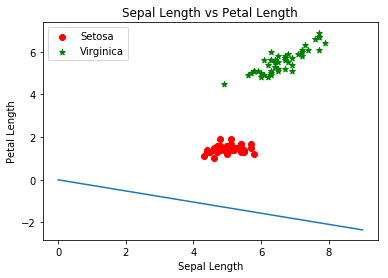

Weights:  [ 0.    0.24  0.92]
Miscalculations:  [2, 2]


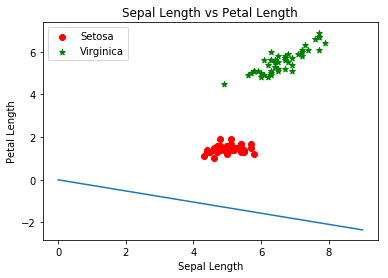

Weights:  [-0.1  -0.12  1.19]
Miscalculations:  [2, 2, 3]


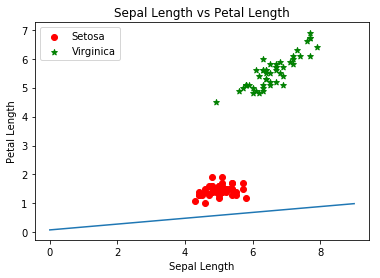

Weights:  [-0.2  -0.63  1.05]
Miscalculations:  [2, 2, 3, 1]


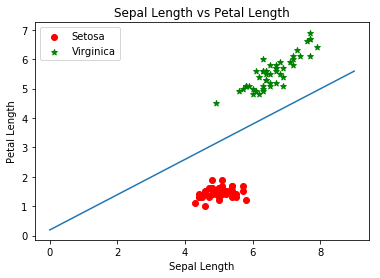

Weights:  [-0.2  -0.63  1.05]
Miscalculations:  [2, 2, 3, 1, 0]


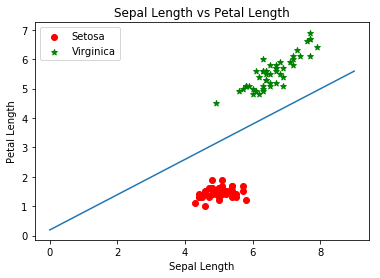

Weights:  [-0.2  -0.63  1.05]
Miscalculations:  [2, 2, 3, 1, 0, 0]


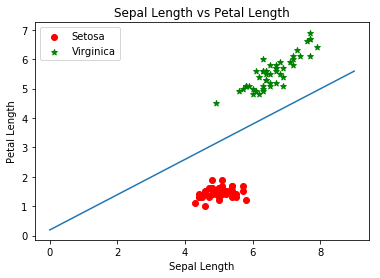

Weights:  [-0.2  -0.63  1.05]
Miscalculations:  [2, 2, 3, 1, 0, 0, 0]


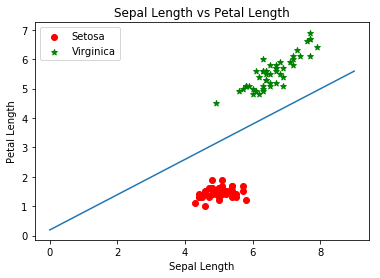

Weights:  [-0.2  -0.63  1.05]
Miscalculations:  [2, 2, 3, 1, 0, 0, 0, 0]


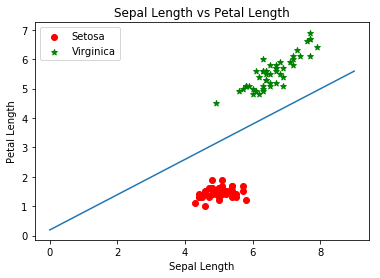

Weights:  [-0.2  -0.63  1.05]
Miscalculations:  [2, 2, 3, 1, 0, 0, 0, 0, 0]


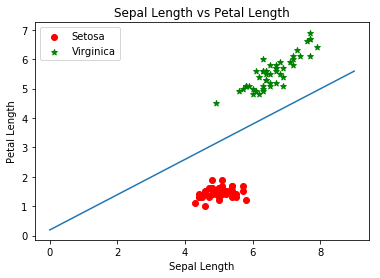

Weights:  [-0.2  -0.63  1.05]
Miscalculations:  [2, 2, 3, 1, 0, 0, 0, 0, 0, 0]


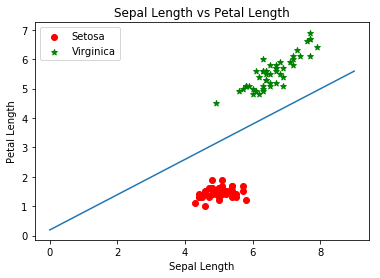

In [7]:
#Instance of Perceptron for linearly separable classes. (Setosa vs Virginica)
ppn = Perceptron01(eta=0.1, n_iter=10)
ppn.fit(XSV,ySV,'SV')

#We can conclude that these two Iris classes (Setosa vs Virginica) are linearly separable
#since the perceptron converges at the third epoch. 
#In the first epoch we can see how the plotted line is under the two classes
#but it eventually moves up to separate and define the boundaries for the two classes. 
#Also take a look at the miscalculations, they eventually become zero
#as the weights are more optimal. 

Weights:  [ 0.   -0.07  0.13]
Miscalculations:  [2]


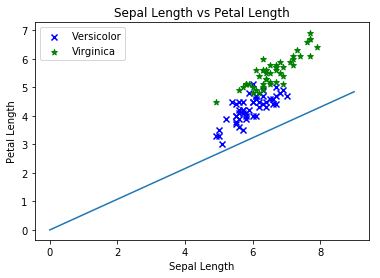

Weights:  [ 0.   -0.14  0.26]
Miscalculations:  [2, 2]


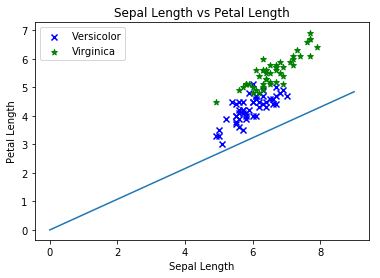

Weights:  [ 0.   -0.21  0.39]
Miscalculations:  [2, 2, 2]


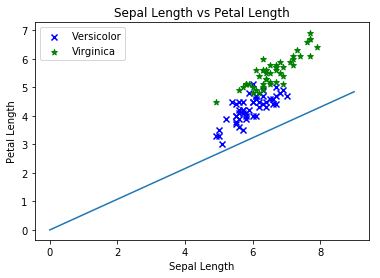

Weights:  [ 0.   -0.28  0.52]
Miscalculations:  [2, 2, 2, 2]


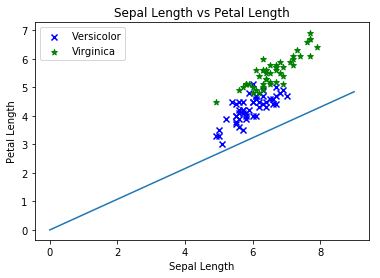

Weights:  [ 0.   -0.35  0.65]
Miscalculations:  [2, 2, 2, 2, 2]


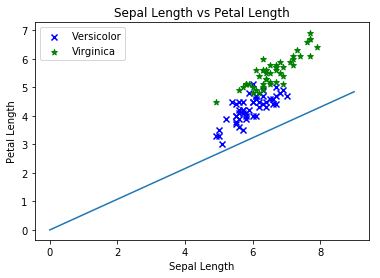

Weights:  [ 0.   -0.42  0.78]
Miscalculations:  [2, 2, 2, 2, 2, 2]


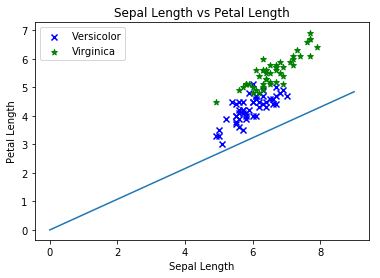

Weights:  [ 0.   -0.49  0.91]
Miscalculations:  [2, 2, 2, 2, 2, 2, 2]


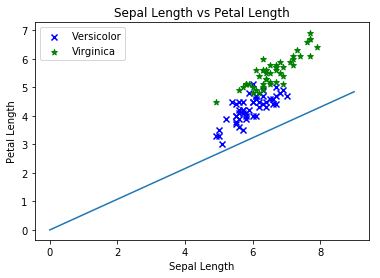

Weights:  [ 0.   -0.56  1.04]
Miscalculations:  [2, 2, 2, 2, 2, 2, 2, 2]


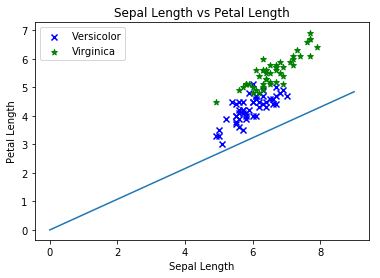

Weights:  [ 0.   -0.63  1.17]
Miscalculations:  [2, 2, 2, 2, 2, 2, 2, 2, 2]


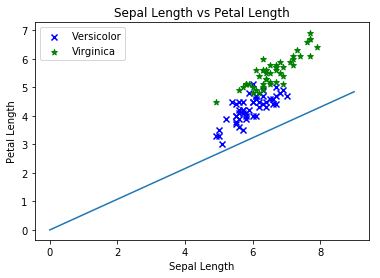

Weights:  [ 0.  -0.7  1.3]
Miscalculations:  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


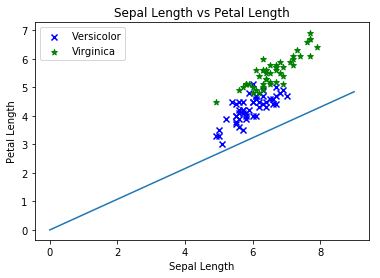

In [8]:
#Instance of Perceptron for non-linearly separable classes. (Versicolor vs Virginica)
ppn2 = Perceptron01(eta=0.1, n_iter=10)
ppn2.fit(XVV,yVV,'VV')

#In the case of Versicolor and Virginica we observe a patter that we don't like.
#The line has been plotted but it is not separating the two classes
#since they are not linearly separable. The weights keep updating in every epoch
#and the number of miscalculations is always greater than zero.
#The perceptron fails to converge in this case. 

Weights:  [  0.00000000e+00   1.20000000e-10   4.60000000e-10]
Miscalculations:  [2]


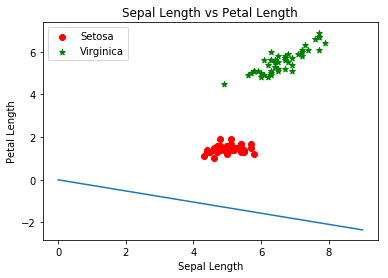

Weights:  [  0.00000000e+00   2.40000000e-10   9.20000000e-10]
Miscalculations:  [2, 2]


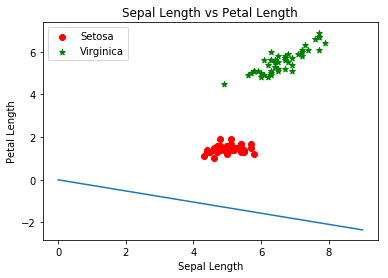

Weights:  [ -1.00000000e-10  -1.20000000e-10   1.19000000e-09]
Miscalculations:  [2, 2, 3]


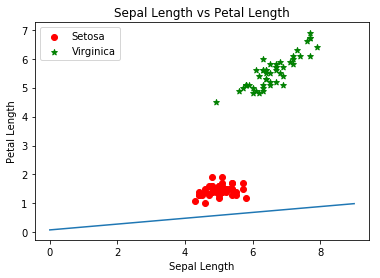

Weights:  [ -2.00000000e-10  -6.30000000e-10   1.05000000e-09]
Miscalculations:  [2, 2, 3, 1]


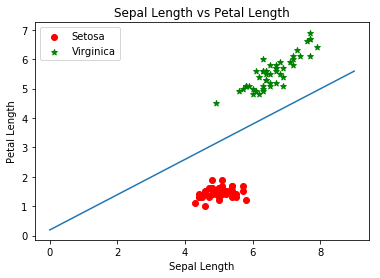

Weights:  [ -2.00000000e-10  -6.30000000e-10   1.05000000e-09]
Miscalculations:  [2, 2, 3, 1, 0]


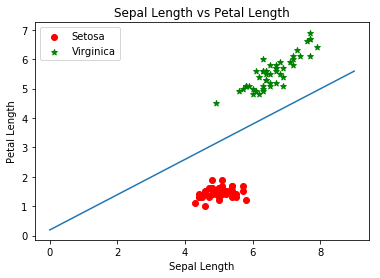

Weights:  [ -2.00000000e-10  -6.30000000e-10   1.05000000e-09]
Miscalculations:  [2, 2, 3, 1, 0, 0]


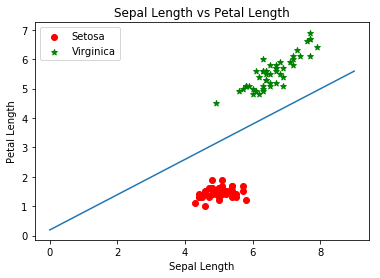

Weights:  [ -2.00000000e-10  -6.30000000e-10   1.05000000e-09]
Miscalculations:  [2, 2, 3, 1, 0, 0, 0]


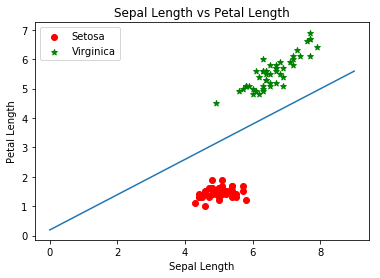

Weights:  [ -2.00000000e-10  -6.30000000e-10   1.05000000e-09]
Miscalculations:  [2, 2, 3, 1, 0, 0, 0, 0]


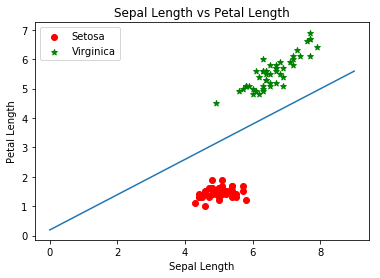

Weights:  [ -2.00000000e-10  -6.30000000e-10   1.05000000e-09]
Miscalculations:  [2, 2, 3, 1, 0, 0, 0, 0, 0]


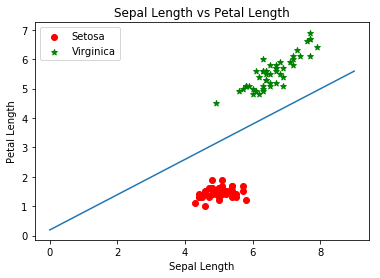

Weights:  [ -2.00000000e-10  -6.30000000e-10   1.05000000e-09]
Miscalculations:  [2, 2, 3, 1, 0, 0, 0, 0, 0, 0]


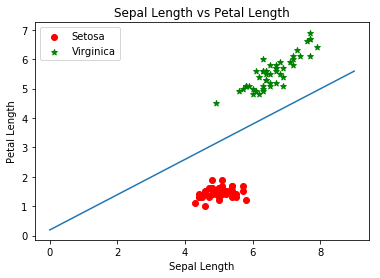

In [9]:
#We will change the learning rate for linearly separable (Setosa vs Virginica)
ppn3 = Perceptron01(eta=0.0000000001, n_iter=10)
ppn3.fit(XSV,ySV,'SV')

#Notice here that we have change the learning rate to a really small
#number. The learning rate seems to re-scale the weights but it still 
#help us obtain the desired line that separates the classes. 

Weights:  [ 0.      0.6666  2.5553]
Miscalculations:  [2]


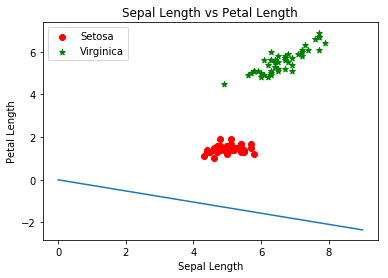

Weights:  [ 0.      1.3332  5.1106]
Miscalculations:  [2, 2]


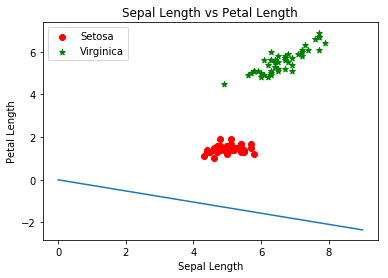

Weights:  [-0.5555  -0.6666   6.61045]
Miscalculations:  [2, 2, 3]


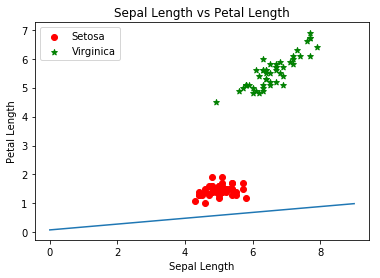

Weights:  [-1.111   -3.49965  5.83275]
Miscalculations:  [2, 2, 3, 1]


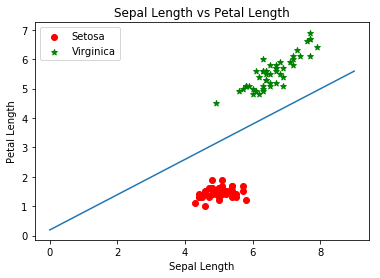

Weights:  [-1.111   -3.49965  5.83275]
Miscalculations:  [2, 2, 3, 1, 0]


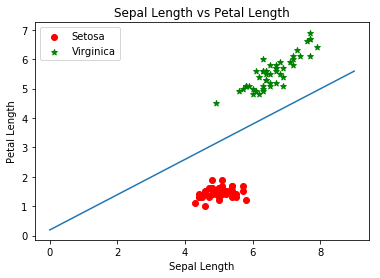

Weights:  [-1.111   -3.49965  5.83275]
Miscalculations:  [2, 2, 3, 1, 0, 0]


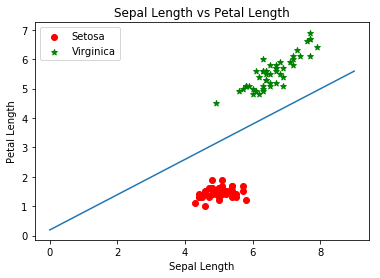

Weights:  [-1.111   -3.49965  5.83275]
Miscalculations:  [2, 2, 3, 1, 0, 0, 0]


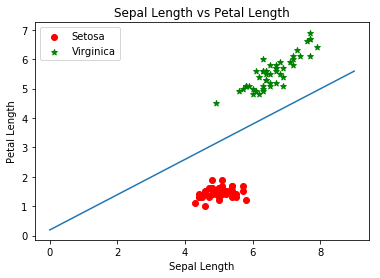

Weights:  [-1.111   -3.49965  5.83275]
Miscalculations:  [2, 2, 3, 1, 0, 0, 0, 0]


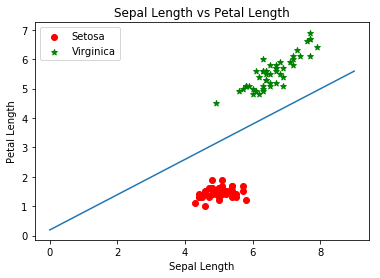

Weights:  [-1.111   -3.49965  5.83275]
Miscalculations:  [2, 2, 3, 1, 0, 0, 0, 0, 0]


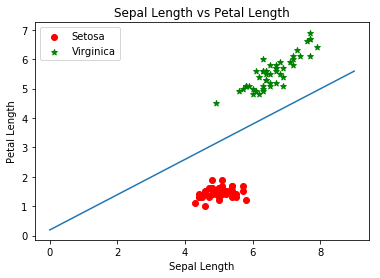

Weights:  [-1.111   -3.49965  5.83275]
Miscalculations:  [2, 2, 3, 1, 0, 0, 0, 0, 0, 0]


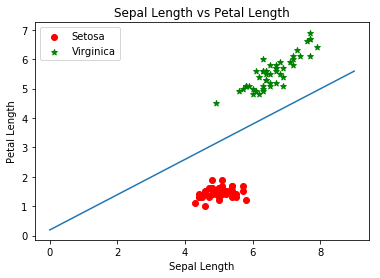

In [10]:
#We will change the learning rate for linearly separable (Setosa vs Virginica)
ppn4 = Perceptron01(eta=0.5555, n_iter=10)
ppn4.fit(XSV,ySV,'SV')

#Here our learning rate is really high but the perceptron still converges
#Notice that we obtain high numbers for the weights as well. 

Weights:  [  0.00000000e+00  -7.00000000e-08   1.30000000e-07]
Miscalculations:  [2]


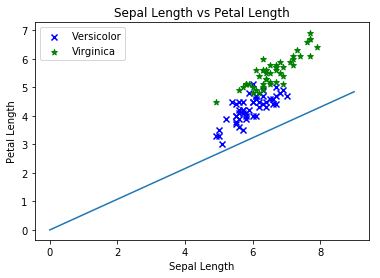

Weights:  [  0.00000000e+00  -1.40000000e-07   2.60000000e-07]
Miscalculations:  [2, 2]


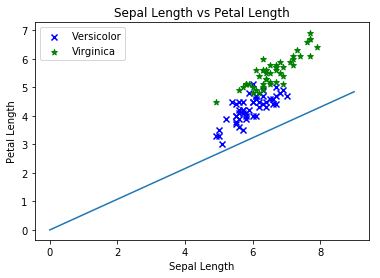

Weights:  [  0.00000000e+00  -2.10000000e-07   3.90000000e-07]
Miscalculations:  [2, 2, 2]


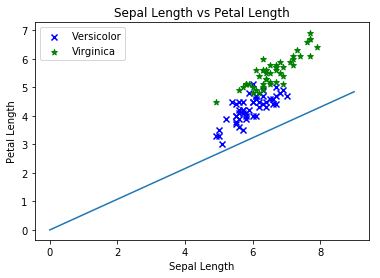

Weights:  [  0.00000000e+00  -2.80000000e-07   5.20000000e-07]
Miscalculations:  [2, 2, 2, 2]


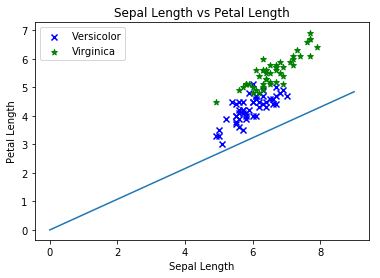

Weights:  [  0.00000000e+00  -3.50000000e-07   6.50000000e-07]
Miscalculations:  [2, 2, 2, 2, 2]


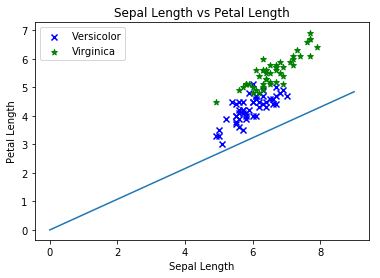

Weights:  [  0.00000000e+00  -4.20000000e-07   7.80000000e-07]
Miscalculations:  [2, 2, 2, 2, 2, 2]


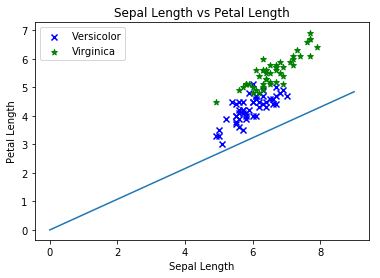

Weights:  [  0.00000000e+00  -4.90000000e-07   9.10000000e-07]
Miscalculations:  [2, 2, 2, 2, 2, 2, 2]


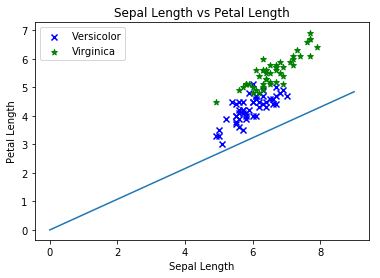

Weights:  [  0.00000000e+00  -5.60000000e-07   1.04000000e-06]
Miscalculations:  [2, 2, 2, 2, 2, 2, 2, 2]


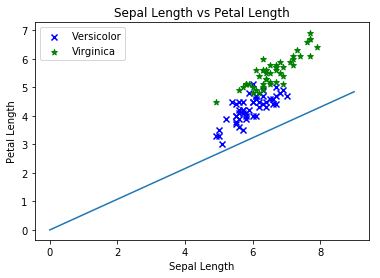

Weights:  [  0.00000000e+00  -6.30000000e-07   1.17000000e-06]
Miscalculations:  [2, 2, 2, 2, 2, 2, 2, 2, 2]


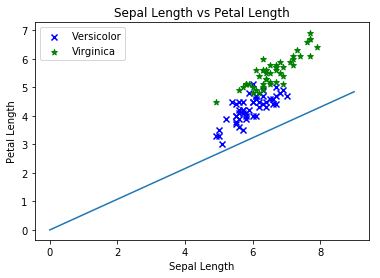

Weights:  [  0.00000000e+00  -7.00000000e-07   1.30000000e-06]
Miscalculations:  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


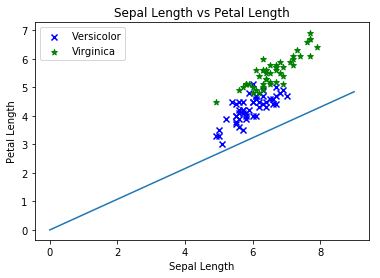

In [11]:
#Changing the learning rate for non-linearly separable (Versicolor vs Virginica)
ppn2 = Perceptron01(eta=0.0000001, n_iter=10)
ppn2.fit(XVV,yVV,'VV')

#Even when the learning rate is low, the weights still keep chaning in every epoch
#and the miscalculations are always preset. Not converging. 

Weights:  [ 0.    0.19  0.33]
Miscalculations:  [2]


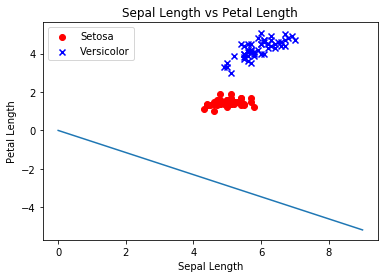

Weights:  [ 0.    0.38  0.66]
Miscalculations:  [2, 2]


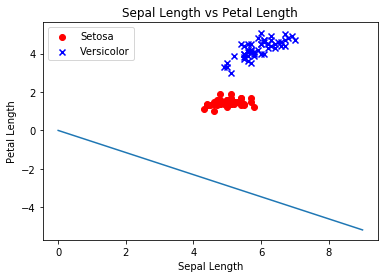

Weights:  [-0.1   0.11  0.84]
Miscalculations:  [2, 2, 3]


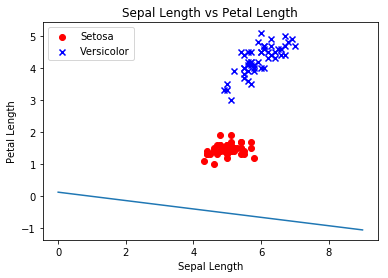

Weights:  [-0.1   0.17  1.05]
Miscalculations:  [2, 2, 3, 2]


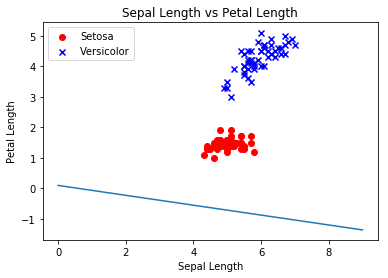

Weights:  [-0.2  -0.34  0.91]
Miscalculations:  [2, 2, 3, 2, 1]


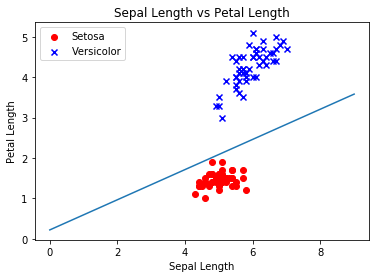

Weights:  [-0.2  -0.34  0.91]
Miscalculations:  [2, 2, 3, 2, 1, 0]


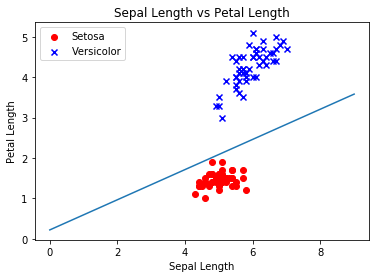

Weights:  [-0.2  -0.34  0.91]
Miscalculations:  [2, 2, 3, 2, 1, 0, 0]


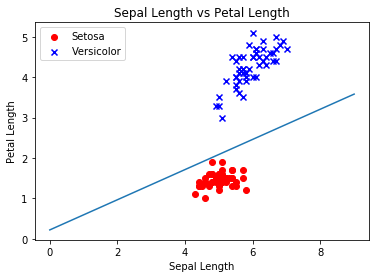

Weights:  [-0.2  -0.34  0.91]
Miscalculations:  [2, 2, 3, 2, 1, 0, 0, 0]


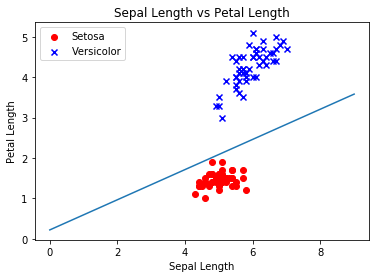

Weights:  [-0.2  -0.34  0.91]
Miscalculations:  [2, 2, 3, 2, 1, 0, 0, 0, 0]


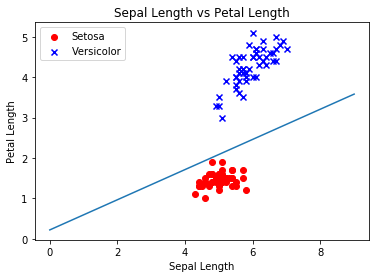

Weights:  [-0.2  -0.34  0.91]
Miscalculations:  [2, 2, 3, 2, 1, 0, 0, 0, 0, 0]


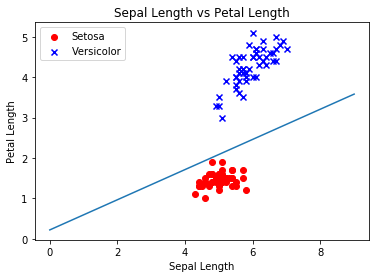

In [12]:
#This is the plot for Setosa and Versicolor. Just for completition 

ppn4 = Perceptron01(eta=0.1, n_iter=10)
ppn4.fit(XSVc,ySVc,'SVc')